# Clustering & PCA

## 1. Read and visualize the data

In [76]:
# Load all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Reading the csv file
df=pd.read_csv("Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Check for any missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.shape

(167, 10)

In [8]:
# Converting the percentage values to the absolute values for 3 columns : exports, imports and health
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 2. PCA

In [10]:
# Preserving country column to use it later
y = df["country"]

In [11]:
# Perform scaling using the standard scalar
scaler = StandardScaler()

In [12]:
X = df.copy()
X = X.drop('country',axis=1)

In [13]:
x = scaler.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
x

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [15]:
# Import PCA module
from sklearn.decomposition import PCA

In [16]:
# Create an instance of PCA
pca = PCA(svd_solver = 'randomized',random_state=42)

In [17]:
# Apply PCA
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [19]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

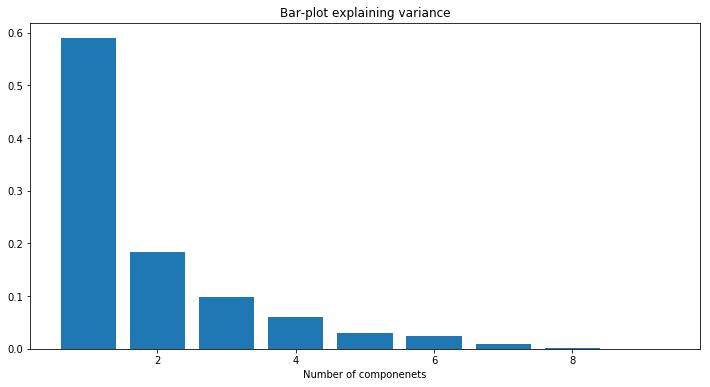

In [20]:
# Bar-plot explaining variance
plt.figure(figsize=(12,6))
plt.title('Bar-plot explaining variance')
plt.xlabel('Number of componenets')
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

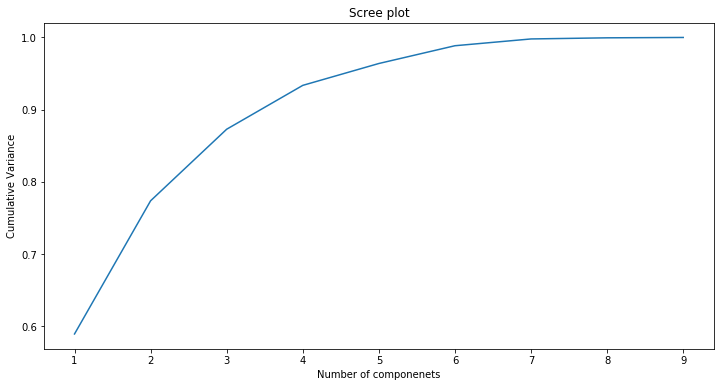

In [22]:
# Scree plot
plt.figure(figsize=(12,6))
plt.title('Scree plot')
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Number of componenets')
plt.ylabel('Cumulative Variance')
plt.show()

PCA with 4 components

In [23]:
# Let us take n_components = 4
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 4)

In [24]:
newdata = pca_final.fit_transform(x)

In [25]:
newdata.shape

(167, 4)

Making a dataframe out of it for convenience



In [26]:
pca_df = pd.DataFrame(newdata, columns=["PC1", "PC2", "PC3", "PC4"])
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [27]:
pca_df2 = pd.concat([y,pca_df], axis=1)

In [28]:
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5b37ea940>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5b37eafd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5b37ea518>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5b37f76a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5b37f79e8>],
 'means': []}

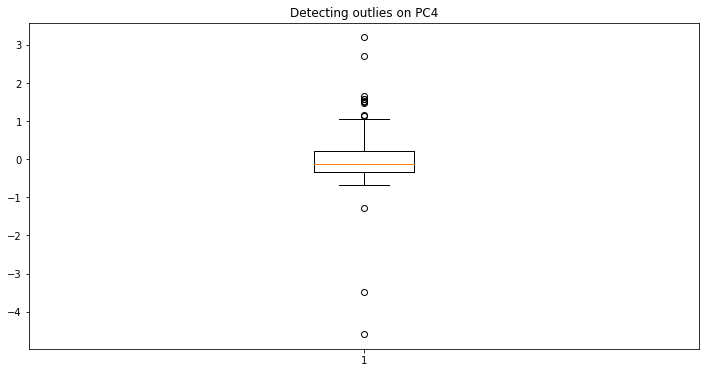

In [29]:
plt.figure(figsize=(12,6))
plt.title('Detecting outlies on PC4')
plt.boxplot(pca_df2.PC4)

In [30]:
# Counting the outliers for 4 components
Q1 = pca_df2.quantile(0.25)
Q3 = pca_df2.quantile(0.75)
IQR = Q3-Q1
((pca_df2 < (Q1 - 1.5 * IQR)) | (pca_df2 > (Q3 + 1.5 * IQR))).sum()

PC1         8
PC2         2
PC3        10
PC4        13
country     0
dtype: int64

In [31]:
# Removing the outliers for the 4 components using IQR treatment 
Q1 = pca_df2.quantile(0.25)
Q3 = pca_df2.quantile(0.75)
IQR = Q3-Q1

pca_df2 = pca_df2[~((pca_df2 < (Q1 - 1.5 * IQR)) | (pca_df2 > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [32]:
# Let's look at the scarifice
print(pca_df2.shape)
# Percentage of outliers removed
print(100*(167-141)/167)

pca_df2.head()

(141, 5)
15.568862275449101


,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


## 3. K-MEAN

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
hopkins(pca_df2.drop(['country'], axis = 1))

0.8467990170718122

In [35]:
# A Hopkin of Zero: That your data is completely random, It doesn't have any visible clusters
# A Hopking of 50%: Not random but not so good for clustering
# A hopkin of >75% : JUST GOOD
# A hopkin of >85%: Very good for clustering

In [36]:
df_1 = pca_df2.drop(['country'], axis=1).copy()
df_1.shape

(141, 4)

For n_clusters=2, the silhouette score is 0.48008507526432204
For n_clusters=3, the silhouette score is 0.4961642271644334
For n_clusters=4, the silhouette score is 0.4148820375160271
For n_clusters=5, the silhouette score is 0.3565560215690697
For n_clusters=6, the silhouette score is 0.3545944340006289
For n_clusters=7, the silhouette score is 0.34591919167243407
For n_clusters=8, the silhouette score is 0.3308533334496506
For n_clusters=9, the silhouette score is 0.3680012429473278


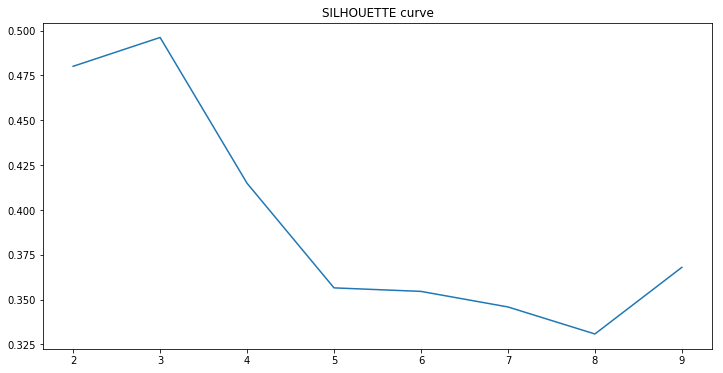

In [37]:
# Check the optimal K
# SILHOUETTE
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df_1)
    sil.append([k, silhouette_score(df_1, kmeans.labels_)])
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_score(df_1, kmeans.labels_)))
plt.figure(figsize=(12,6))
plt.title('SILHOUETTE curve')
plt.plot(pd.DataFrame(sil)[0], pd.DataFrame(sil)[1])

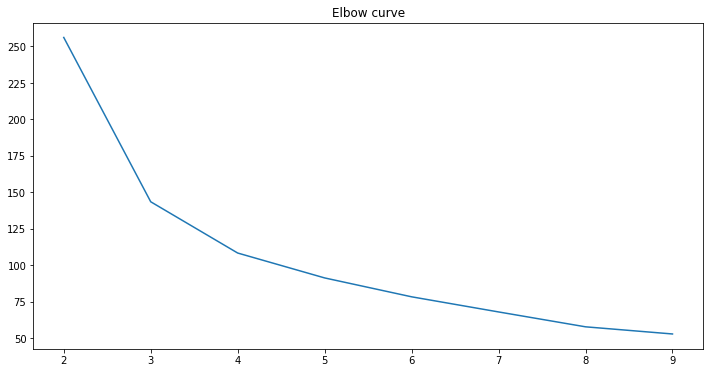

In [38]:
# Elbow
ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_1)
    ssd.append([k, kmeans.inertia_])
plt.figure(figsize=(12,6))
plt.title('Elbow curve')
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [39]:
# K = 3
model_clus3 = KMeans(n_clusters =3, random_state = 50)
model_clus3.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [40]:
df_km = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(model_clus3.labels_).reset_index().drop('index', axis=1)], axis = 1)

In [41]:
df_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
df_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,2
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,0
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,0
3,Angola,-2.723581,2.176018,0.597794,0.438919,2
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,0


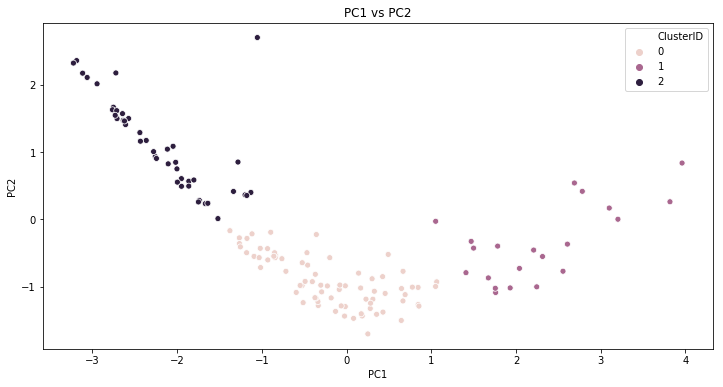

In [42]:
# We can't profile this data
# PC1 vs PC2
plt.figure(figsize=(12,6))
plt.title('PC1 vs PC2')
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'ClusterID', data = df_km)

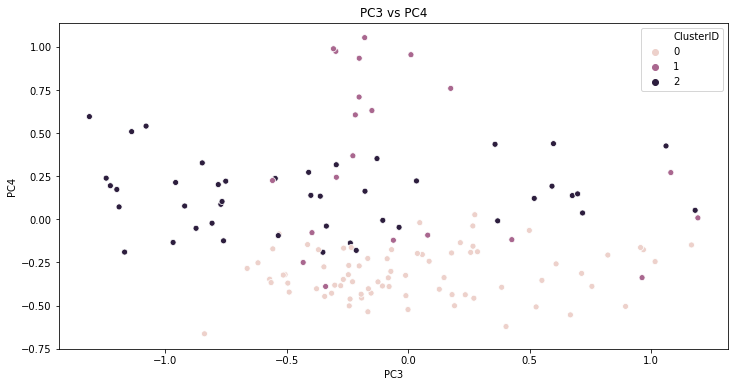

In [43]:
# PC3 vs PC4
plt.figure(figsize=(12,6))
plt.title('PC3 vs PC4')
sns.scatterplot(x = 'PC3', y= 'PC4', hue = 'ClusterID', data = df_km)

##### From the K-Means we got to know that cluster value of 3 is best fit. Now, will check the same with Hierarichical clustering 

## 4. Hierarchical Clustering

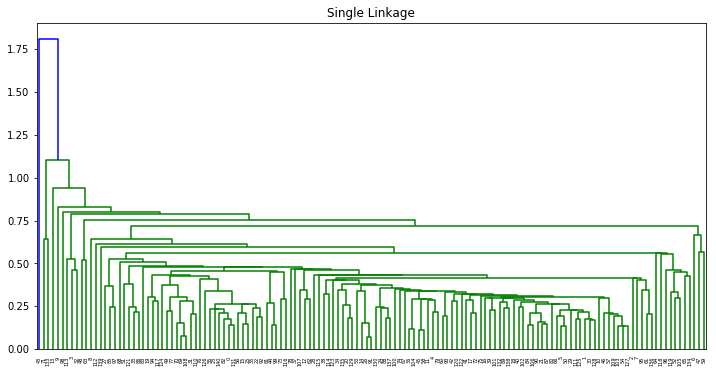

In [44]:
# single linkage
plt.figure(figsize=(12,6))
plt.title('Single Linkage')
mergings = linkage(df_1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

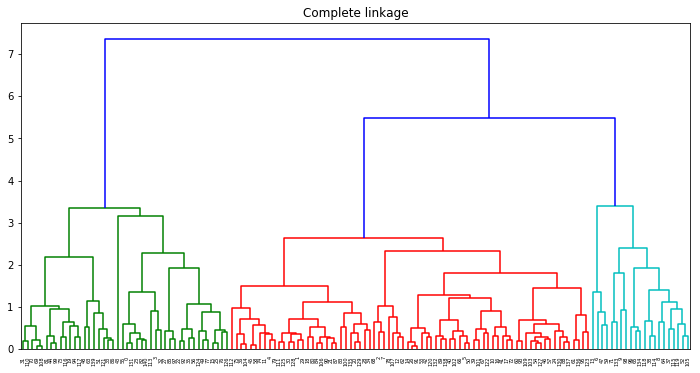

In [45]:
# complete linkage
plt.figure(figsize=(12,6))
plt.title('Complete linkage')
mergings = linkage(df_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### From the above plot, we can consider the cluster value to be 3

In [46]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 0])

In [47]:
# assign cluster labels
df_1['cluster_labels'] = cluster_labels
df_1.head()

,PC1,PC2,PC3,PC4,cluster_labels
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,0
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [48]:
df_hc = pd.concat([pca_df2.reset_index().drop('index', axis=1), pd.Series(df_1['cluster_labels']).reset_index().drop('index', axis=1)], axis = 1)

In [49]:
df_hc.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'Cluster_Labels']
df_hc.head()

,country,PC1,PC2,PC3,PC4,Cluster_Labels
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1


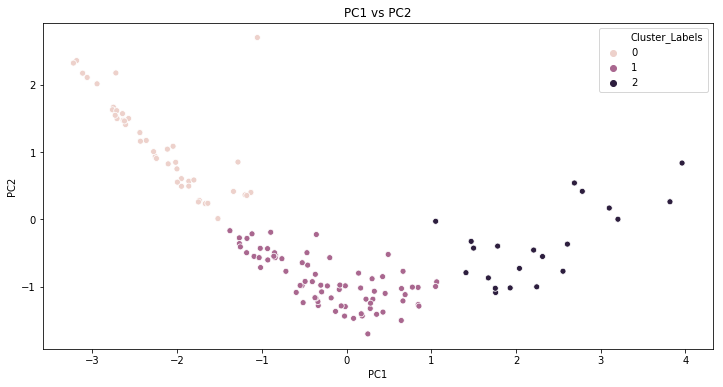

In [50]:
#PC1 vs PC2
plt.figure(figsize=(12,6))
plt.title('PC1 vs PC2')
sns.scatterplot(x = 'PC1', y= 'PC2', hue = 'Cluster_Labels', data = df_hc)

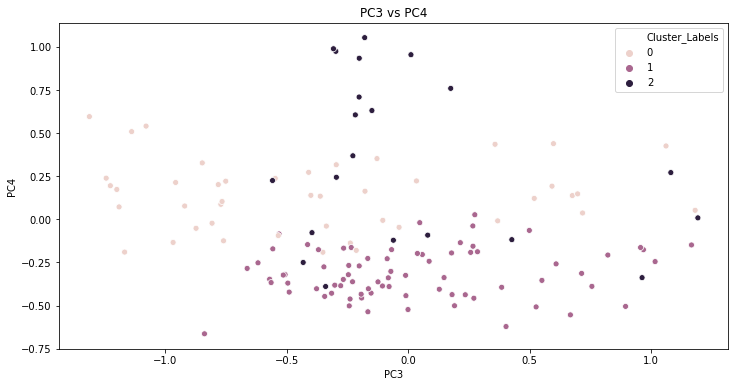

In [51]:
# PC3 vs PC4
plt.figure(figsize=(12,6))
plt.title('PC3 vs PC4')
sns.scatterplot(x = 'PC3', y= 'PC4', hue = 'Cluster_Labels', data = df_hc)

### Cluster Profiling for Hirerachical cluster data

In [52]:
# Merging PCA data with original data for profiling
df_hc2 = pd.merge(df, df_hc, how = 'inner', on = 'country')
df_hc2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Cluster_Labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,1


In [53]:
df_hc2.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis = 1, inplace = True)

In [54]:
df_hc2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [55]:
# Check count of observations in each cluster
df_hc2.Cluster_Labels.value_counts()

1    76
0    44
2    21
Name: Cluster_Labels, dtype: int64

In [56]:
df_hc2.groupby('Cluster_Labels')[['child_mort','income','gdpp']].mean()

,child_mort,income,gdpp
Cluster_Labels,,,
0,87.447727,4038.295455,1922.818182
1,22.417105,11405.526316,5890.947368
2,5.752381,36866.666667,31080.952381


In [57]:
# Let's reload the original data
df_hc_test = pd.read_csv('Country-data.csv')

In [58]:
under_dev_hc=df_hc_test[(df_hc_test['child_mort']>=87.447727)&(df_hc_test['gdpp']<=1922.818182)&(df_hc_test['income']<=4038.295455)]

##### Top 10 under developed countries based on hierarchical clustering

In [59]:
under_dev_hc.sort_values(by='child_mort', ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758


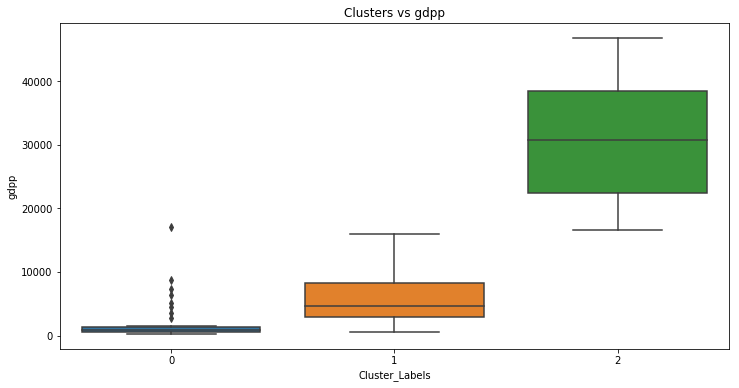

In [60]:
# Clusters vs gdpp
plt.figure(figsize=(12,6))
plt.title('Clusters vs gdpp')
sns.boxplot(x='Cluster_Labels', y='gdpp', data=df_hc2)

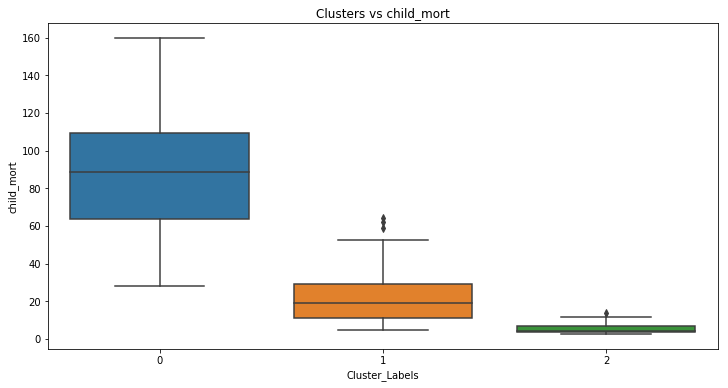

In [61]:
# Clusters vs child_mort
plt.figure(figsize=(12,6))
plt.title('Clusters vs child_mort')
sns.boxplot(x='Cluster_Labels', y='child_mort', data=df_hc2)

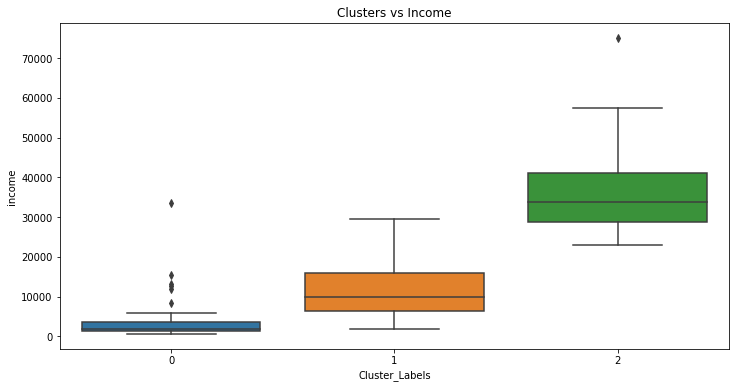

In [62]:
# Clusters vs Income
plt.figure(figsize=(12,6))
plt.title('Clusters vs Income')
sns.boxplot(x='Cluster_Labels', y='income', data=df_hc2)

### Cluster Profiling for K-Means cluster data

In [63]:
# Merging PCA data with original data for profiling
df_km2 = pd.merge(df, df_km, how = 'inner', on = 'country')
df_km2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636647,1.472085,-0.546500,0.237267,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023845,-1.435816,-0.009080,-0.442921,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459260,-0.678794,0.967852,-0.176389,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723581,2.176018,0.597794,0.438919,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648777,-1.026498,-0.244170,-0.267513,0


In [64]:
df_km2.drop(['PC1', 'PC2', 'PC3', 'PC4'], axis = 1, inplace = True)

In [65]:
df_km2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [66]:
# Check count of observations in each cluster
df_km2.ClusterID.value_counts()

0    76
2    44
1    21
Name: ClusterID, dtype: int64

In [67]:
df_km2.groupby('ClusterID')[['child_mort','income','gdpp']].mean()

,child_mort,income,gdpp
ClusterID,,,
0,22.417105,11405.526316,5890.947368
1,5.752381,36866.666667,31080.952381
2,87.447727,4038.295455,1922.818182


In [68]:
# Let's reload the original data
df_km_test = pd.read_csv('Country-data.csv')

In [69]:
under_dev_km=df_km_test[(df_km_test['child_mort']>=87.447727)&(df_km_test['gdpp']<=1922.818182)&(df_km_test['income']<=4038.295455)]

##### Top 10 under developed countries based on K-Means clustering

In [70]:
under_dev_km.sort_values(by='child_mort', ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
112,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758


In [71]:
under_dev_km.sort_values(by='gdpp', ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547


In [72]:
under_dev_km.sort_values(by='income', ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399


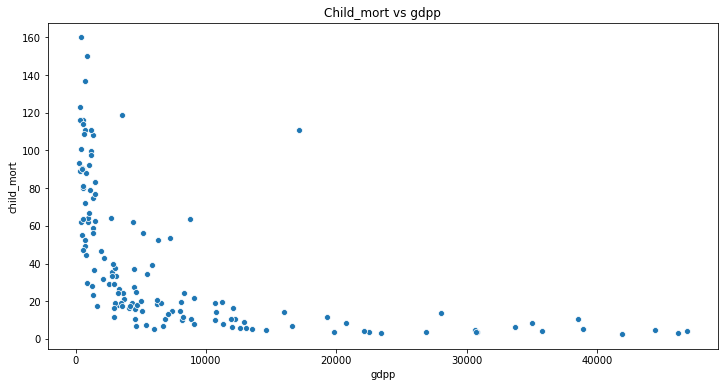

In [73]:
# GDPP vs Child_mort
plt.figure(figsize=(12,6))
plt.title('Child_mort vs gdpp')
sns.scatterplot(x = 'gdpp', y= 'child_mort', data = df_km2)

###### From the above plot, Child Mortality is high with low gdpp

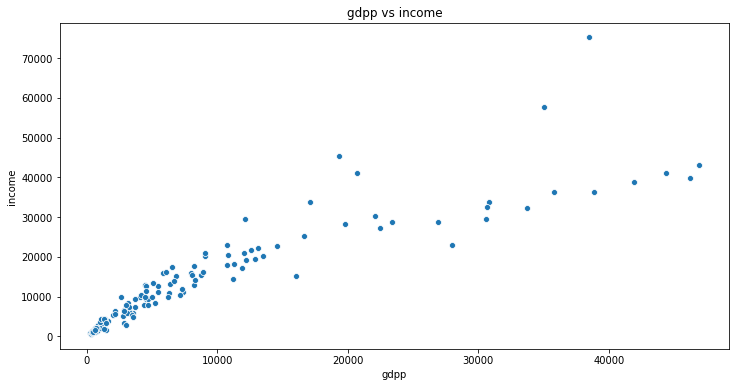

In [74]:
# GDPP vs Income
plt.figure(figsize=(12,6))
plt.title('gdpp vs income')
sns.scatterplot(x = 'gdpp', y= 'income', data = df_km2)

###### From the above plot, it was clear that, Income varies linearly with gdpp

### So, from the above 2 models (Hirerachical and K-Means) we can conclude that the below list of countries are top 10 with highest mortality rate

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Niger
- Burkina Faso
- Congo, Dem. Rep.
- Guinea-Bissau
- Benin
